In [46]:
%matplotlib ipympl
from models import *
from impedance.models.circuits import CustomCircuit
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [ ]:
#freq Range
f=np.logspace(-3,1,100)
#lin params
R1_lin=4400
Q_lin=1e-3
R2_lin=3000
alpha=1

#ilin
R1_ilin=
Q_ilin=
R2_ilin=

#two
R1_two=6000
Q_two=1e-3
R2_two=2000
delta=0.21

In [ ]:
L_lin=(2/3)*(0.75*R1_lin+0.25*R2_lin)

L_ilin=(2/3)*(3*R1_ilin*R2_ilin/(R1_ilin-R2_ilin)**3*(R1_ilin**2*np.log(R1_ilin/R2_ilin)-(3/2)*(R1_ilin-R2_ilin/3)*(R1_ilin-R2_ilin)))

L_two=R1_two+beta**3*(R2_two-R1_two)

In [81]:
#delta for two
# delta=0.5

#lin circuit
c_lin=CustomCircuit(initial_guess=[R1_lin,R1_lin*Q_lin,R2_lin*Q_lin,alpha],circuit="TLMlinnew")
z_lin=c_lin.predict(f)

#ilin circuit
c_ilin=CustomCircuit(initial_guess=[R1_ilin,R1_ilin*Q_ilin,R2_ilin*Q_ilin,alpha],circuit="TLMilinnew")
z_ilin=c_ilin.predict(f)

#two circuit
c_two=CustomCircuit(initial_guess=[R1_two,R1_two*Q_two,R2_two*Q_two,delta,alpha],circuit="TLMtwo")
z_two=c_two.predict(f)

c_all=[c_lin,c_ilin,c_two]
z_all=[z_lin,z_ilin,z_two]
profiles=["lin","ilin","two"]
linestyles=[":","--","-."]


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\impedance\models\circuits\circuits.py:144: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")


42.08423345736318
(0.000630957344480193, 15.848931924611133)
36.04359715466907
(0.000630957344480193, 15.848931924611133)
34.74274209234768
(0.000630957344480193, 15.848931924611133)


C:\Users\admin\AppData\Local\Temp\ipykernel_23444\1884333763.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


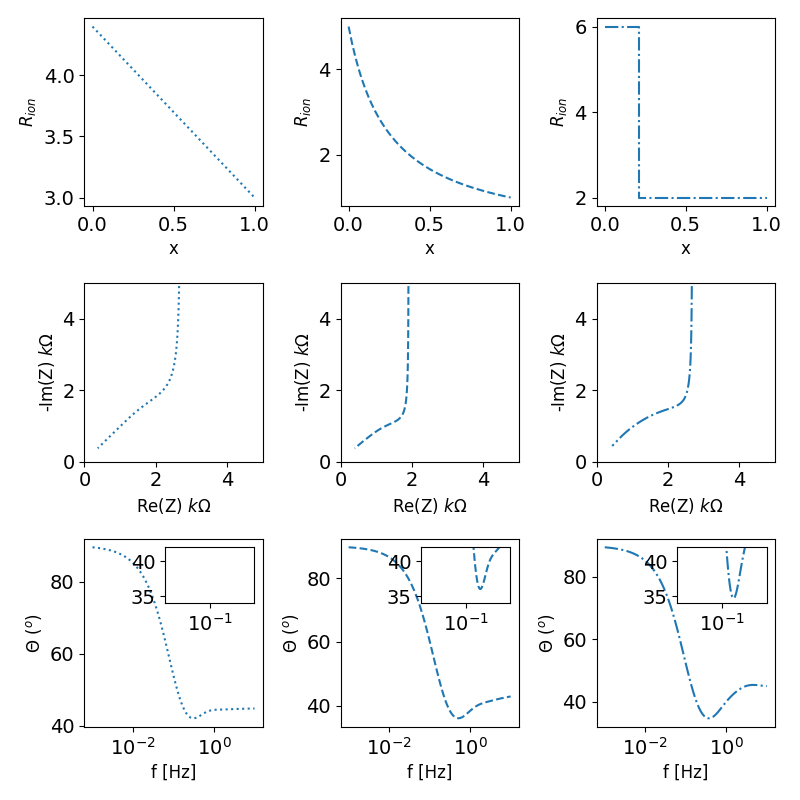

In [82]:
#set the fontsize, labelsizes and fonts etc. for the plots to be made below
plt.rcParams['font.size']=12
plt.rcParams['axes.labelsize']=12
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14


fig, axs=plt.subplots(3,3)
fig.set_size_inches(8,8)

for ax,prof,c,ls in zip(axs[0],profiles,c_all,linestyles):
    ax.set_xlabel("x")
    ax.set_ylabel("$R_{ion}$")
    if prof=="lin":
        ax.plot([0,1],[c.initial_guess[0]/1000,(1/1000)*c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1]],linestyle=ls)

    if prof=="ilin":
        xx=np.linspace(0,1)
        rx=1/((1/c.initial_guess[0])+(1/(c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1])-1/c.initial_guess[0])*xx)
        ax.plot(xx,rx/1000,linestyle=ls)

    if prof=="two":
        ax.plot([0,delta,delta,1],[c.initial_guess[0]/1000,c.initial_guess[0]/1000,(1/1000)*c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1],(1/1000)*c.initial_guess[2]*c.initial_guess[0]/c.initial_guess[1]],linestyle=ls)

for ax,z,ls in zip(axs[1],z_all,linestyles):
    ax.set_xlabel("Re(Z) $k\Omega$")
    ax.set_ylabel("-Im(Z) $k\Omega$")
    ax.plot(np.real(z)/1000,-np.imag(z)/1000,linestyle=ls)
    ax.set_aspect("equal")
    ax.set_xlim(0,5)
    ax.set_ylim(0,5)

for ax,z,ls in zip(axs[2],z_all,linestyles):
    ax.plot(f,-np.angle(z,deg=True),linestyle=ls)
    ax.set_xlabel("f [Hz]")
    ax.set_ylabel("$\Theta$ ($^o$)")
    theta_min=min(-np.angle(z,deg=True))
    print(theta_min)
    ax.set_xscale("log")
    ax_inset=inset_axes(ax,width="50%",height="30%",loc="upper right")
    ax_inset.set_xscale("log")
    ax_inset.plot(f,-np.angle(z,deg=True),linestyle=ls)
    ax_inset.set_ylim(34,42)
    # ax_inset.plot()
    # ax.set_aspect("equal")
    # ax.set_xlim(0,10000)
    # ax.set_ylim(0,10000)
    print(ax.get_xlim())
# 
fig.tight_layout()